# Python Homework 4

**Release date:** Saturday, October 26th <br>
**Due date:** Friday, November 8, 11:59 p.m. via GauchoSpace

**Instruction:** Please upload your jupyter notebook on GauchoSpace with filename "PythonHW4_YOURPERMNUMBER.ipynb".

__Background:__ The <i>Monte Carlo Method (Monte Carlo Simulation)</i> was first published in 1949 by  Nicholas Metropolis and  Stanislaw Ulam in the work \"The Monte Carlo Method\" in the <i>Journal of American Statistics Association</i>. The name Monte Carlo has its origins in the fact that Ulam had an uncle who regularly gambled at the Monte Carlo casino in Monaco. In fact, way before 1949 the method had already been extensively used as a secret project of the U.S. Defense Department during the so-called \"Manhattan Project\". 

The basic principle of the Monte Carlo Method is to implement on a computer the <b>Strong Law of Large Numbers (SLLN)</b>.

As usual, start with loading some packages:

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Problem 1 (5 Points)

Consider flipping $n$ times a coin. The probability for heads is given by $p$ where $p$ is some parameter which you can choose from the interval $(0,1)$.

Write a Python code to simulate $n$ coin flips with heads probability $p$ and compute the running proportion of heads $\bar{X}_n$ for $n$ running from 1 to 1000 trials. Plot your results. Your plot should illustrate how the proportion of heads appears to converge to $p$ as $n$ approaches 1000.

In [3]:
def FlipProbability(rand,n,p):
    np.random.seed(rand) # pick a random 
    
    h = 0
    
    for i in range(n):
        s = np.random.random_sample(1) # for n trials
        
        if(s<p):
            h = h + 1 # accumulate successes
            
    return (h/n) # number of success over the total number of trials


# simulating coin flips with probability of head successes in n trials

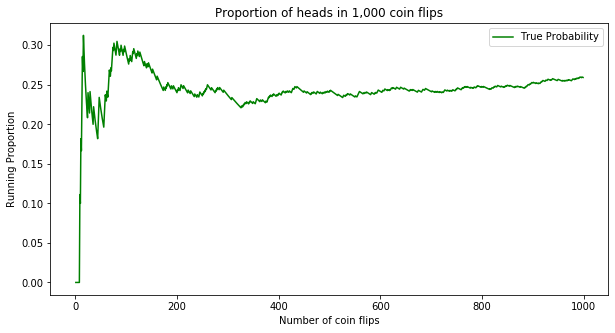

In [4]:
p = 0.25 
n = 1000
PH = []
rand = 150

for i in range(1, n):
    phead = FlipProbability(rand, i, p) # applies FlipProbability function
    PH.append(phead) # adds all results from phead to list PH

    
plt.figure(figsize=(10,5))
plt.title("Proportion of heads in 1,000 coin flips")

plt.plot(range(1,n), PH, '-', color = "green", label = "True Probability")

#plt.plot(np.arange(1000),p*np.ones(1000),'-',color="red",label="true probability")

plt.xlabel("Number of coin flips")
plt.ylabel("Running Proportion")
plt.legend(loc="upper right")

# x and y axis labels and legend

plt.show()


# the plot converges to p = 0.25 as the sample size approaches 1000

## Problem 2 (5 Points)

The Monte Carlo Method is also typically used to numerically compute an approximation of a quantity that is very hard or even impossible to compute like, e.g., integrals (in particular, integrals in very high dimensions!).

Write a Python code to estimate the irrational number  

$$ \pi = 3.1415926535897932384626433\ldots $$

based on the Monte Carlo Method. Specifically, recall that

$$ \pi = \int_0^1 4 \sqrt{1-x^2} dx$$

and generate a sequence $U_1, U_2, \ldots$ of independent, on $[0,1]$ uniformly distributed random variables to perform your MC estimation.

As in Problem 1 above, plot your estimates for different numbers of simulations $n$ running from 1 to 1000. Your plot should again illustrate how your estimate appears to converge to $\pi$.

In [5]:
# Monte Carlo Simulation

from random import random
import math

def MonteCarloMethod(n):
    u = 0
    
    for i in range(n): # a sequence of U1, U2, ...
        x = random()
        Integral = 4*math.sqrt(1 - (x*x)) # value of the integral
        
        u += Integral/n # accumulate u with value of integral divided by number of U in the sequence
        
    return u

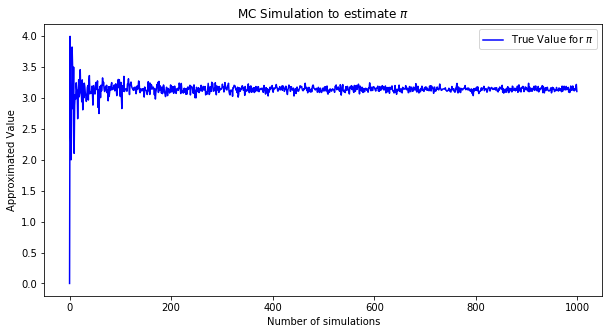

In [6]:
n = 1000 # 1000 trials
p = []

# plotting the estimates for different numbers of simulations n, 1 to 1000

for j in range(n):
    Int = MonteCarloMethod(j)
    p.append(Int)

plt.figure(figsize=(10,5))
plt.title("MC Simulation to estimate $\pi$") # title the plit
#plt.plot(np.arange(1000),np.pi*np.ones(1000),'-',color="red",label="True value for $\pi$") 
plt.plot(range(n), p, '-', color = "blue", label = "True Value for $\pi$")

# label the x and y axes and place the legend in the top right

plt.xlabel("Number of simulations")
plt.ylabel("Approximated Value")
plt.legend(loc="upper right")

plt.show() # show the plot